In [14]:
%load_ext autoreload
%autoreload 2
import sys
import os
import pandas as pd
import numpy as np 
from pathlib import Path
from hypnose_analysis.utils.metrics_utils import *
from hypnose_analysis.utils.visualization_utils import *
from hypnose_analysis.utils.movement_analysis_utils import *
#from utils.visualization_utils import _load_tracking_and_behavior
import harp
from ipywidgets import widgets
from IPython.display import display
import moviepy
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Metrics Visualization

In [2]:
subjid = 40
dates = (20251118, 20251231)

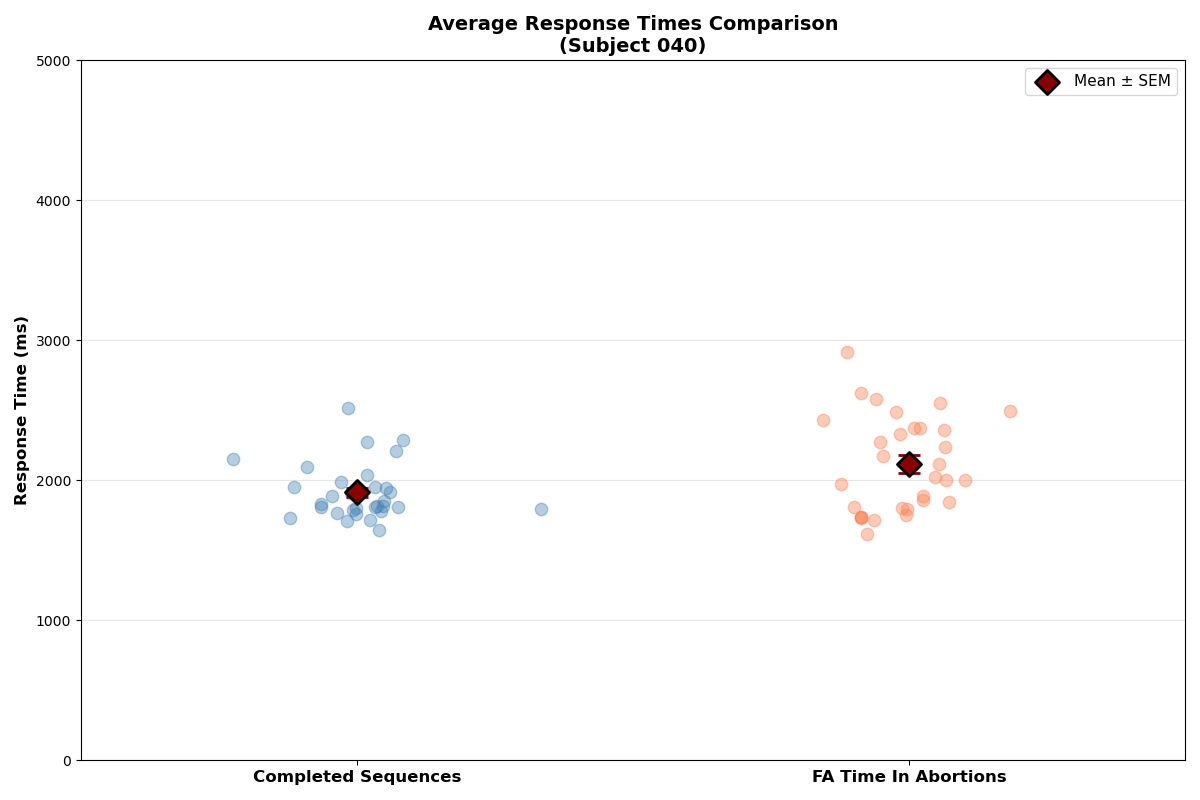

In [5]:
# Plots response times for completes trials vs early choice trials as boxplots
fig, ax = plot_response_times_completed_vs_fa(subjid, dates=dates, y_limit=5000)

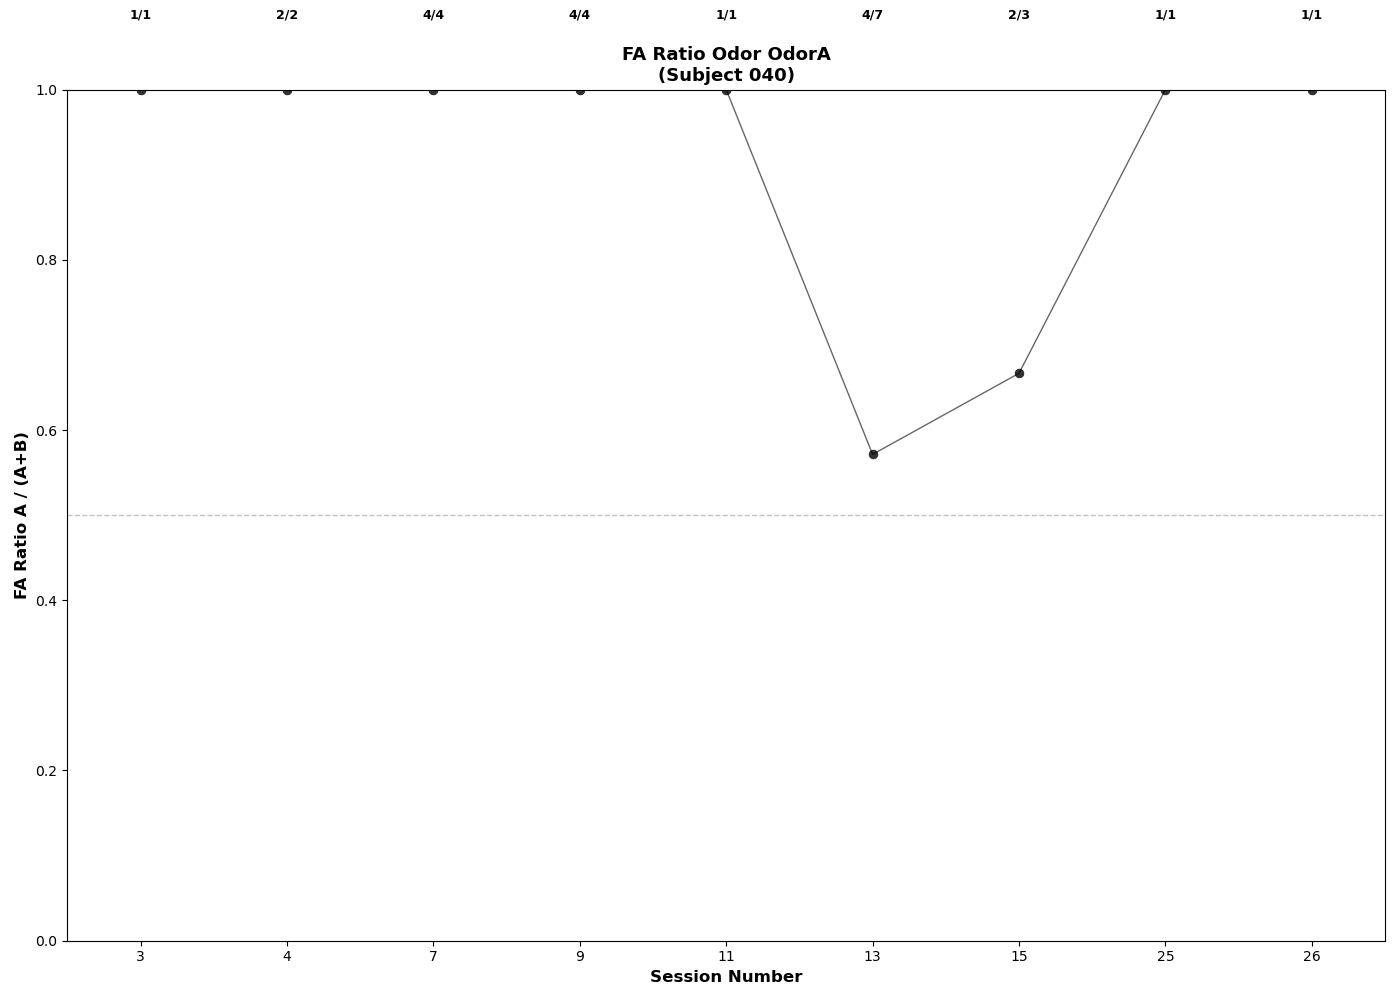

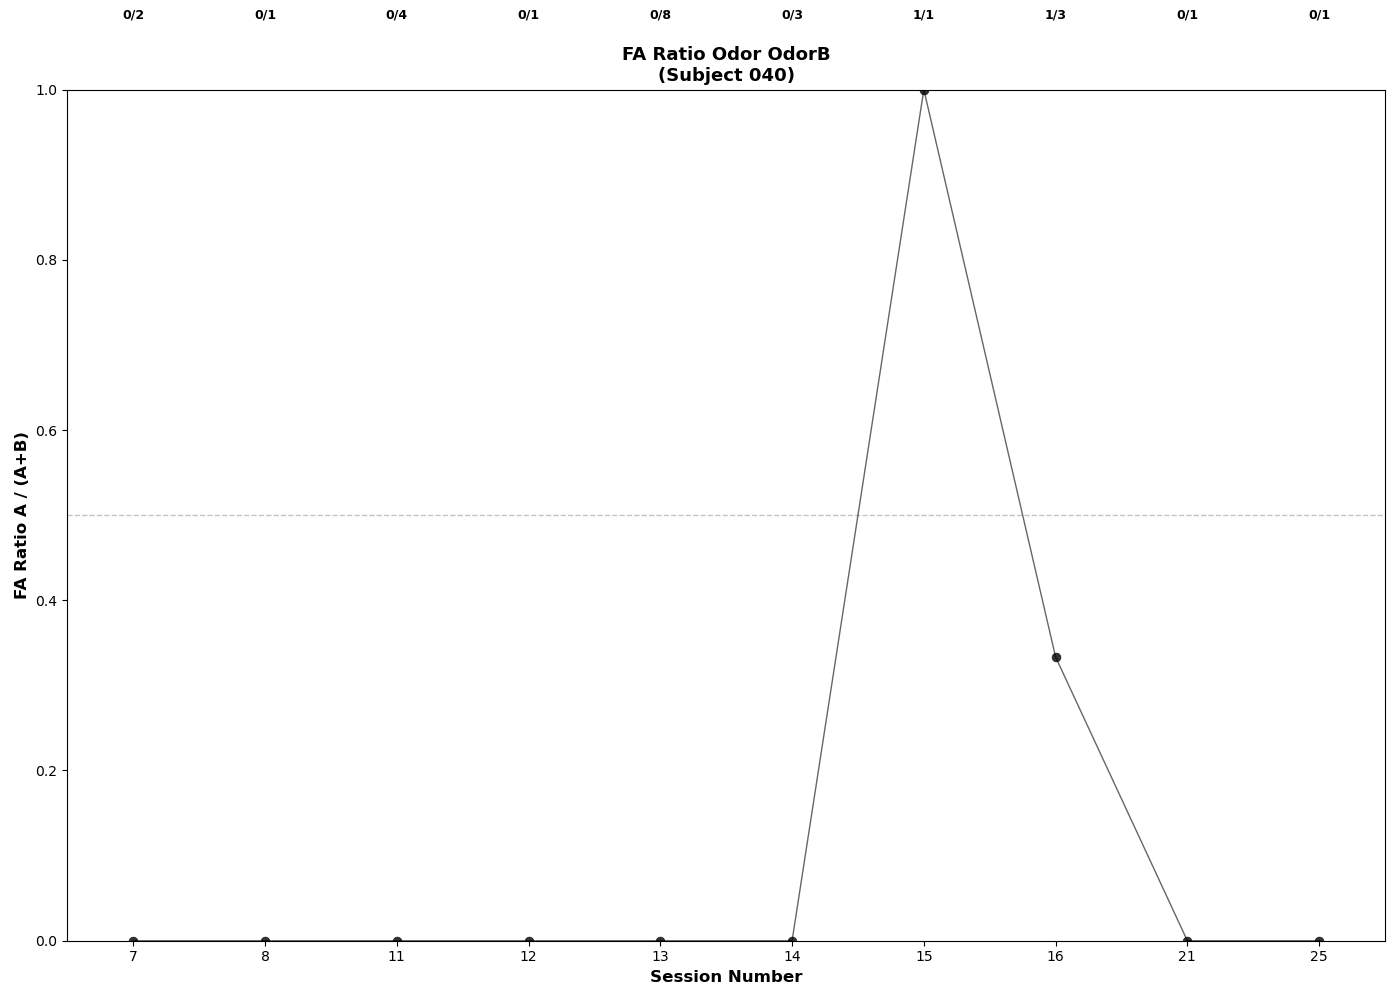

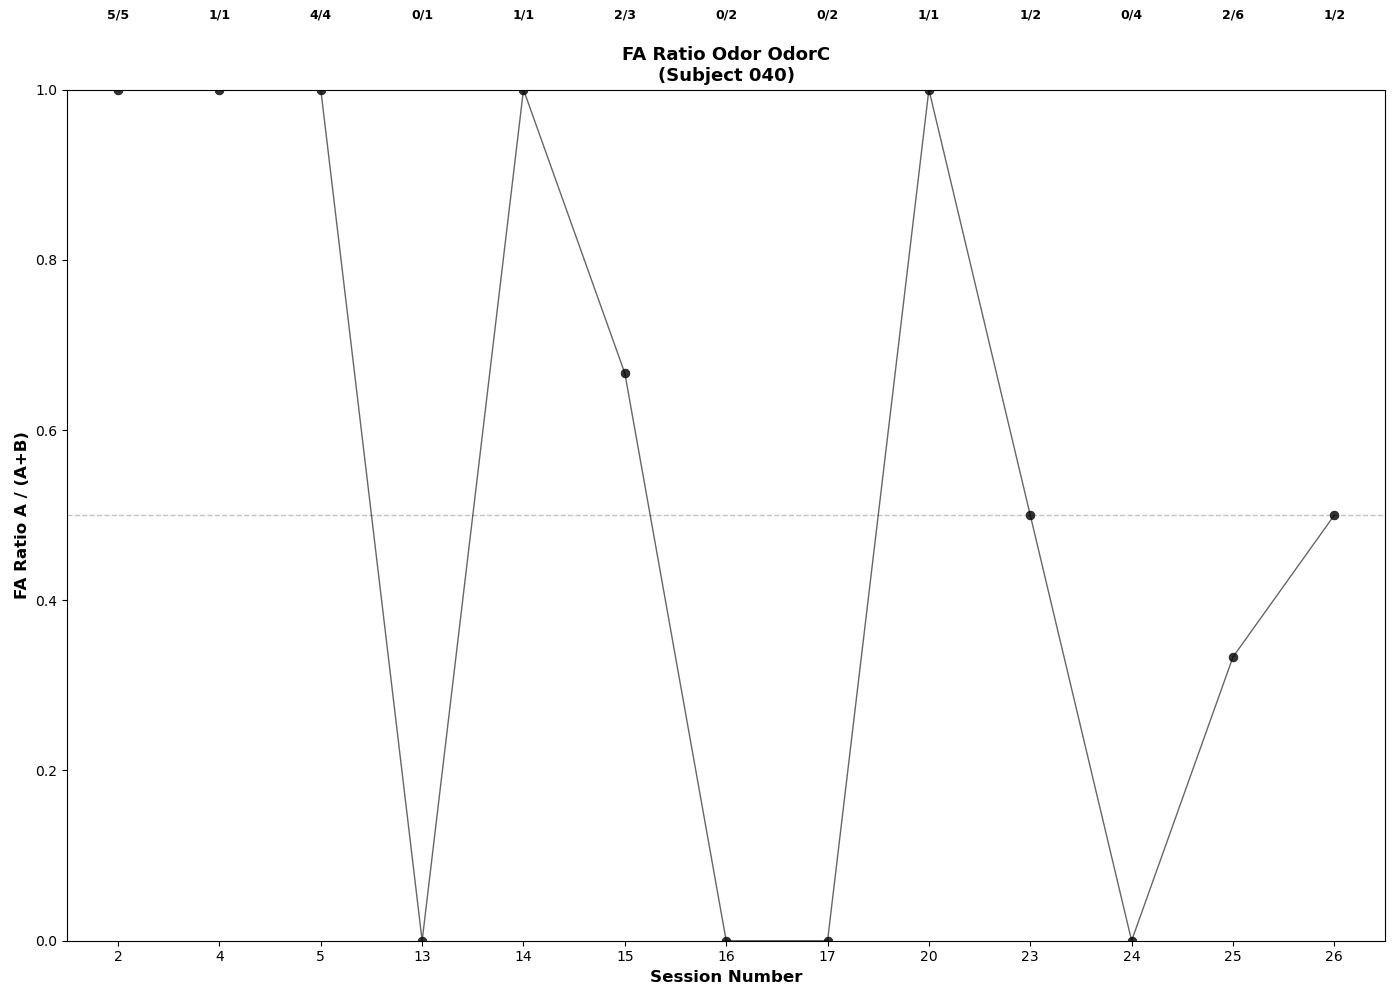

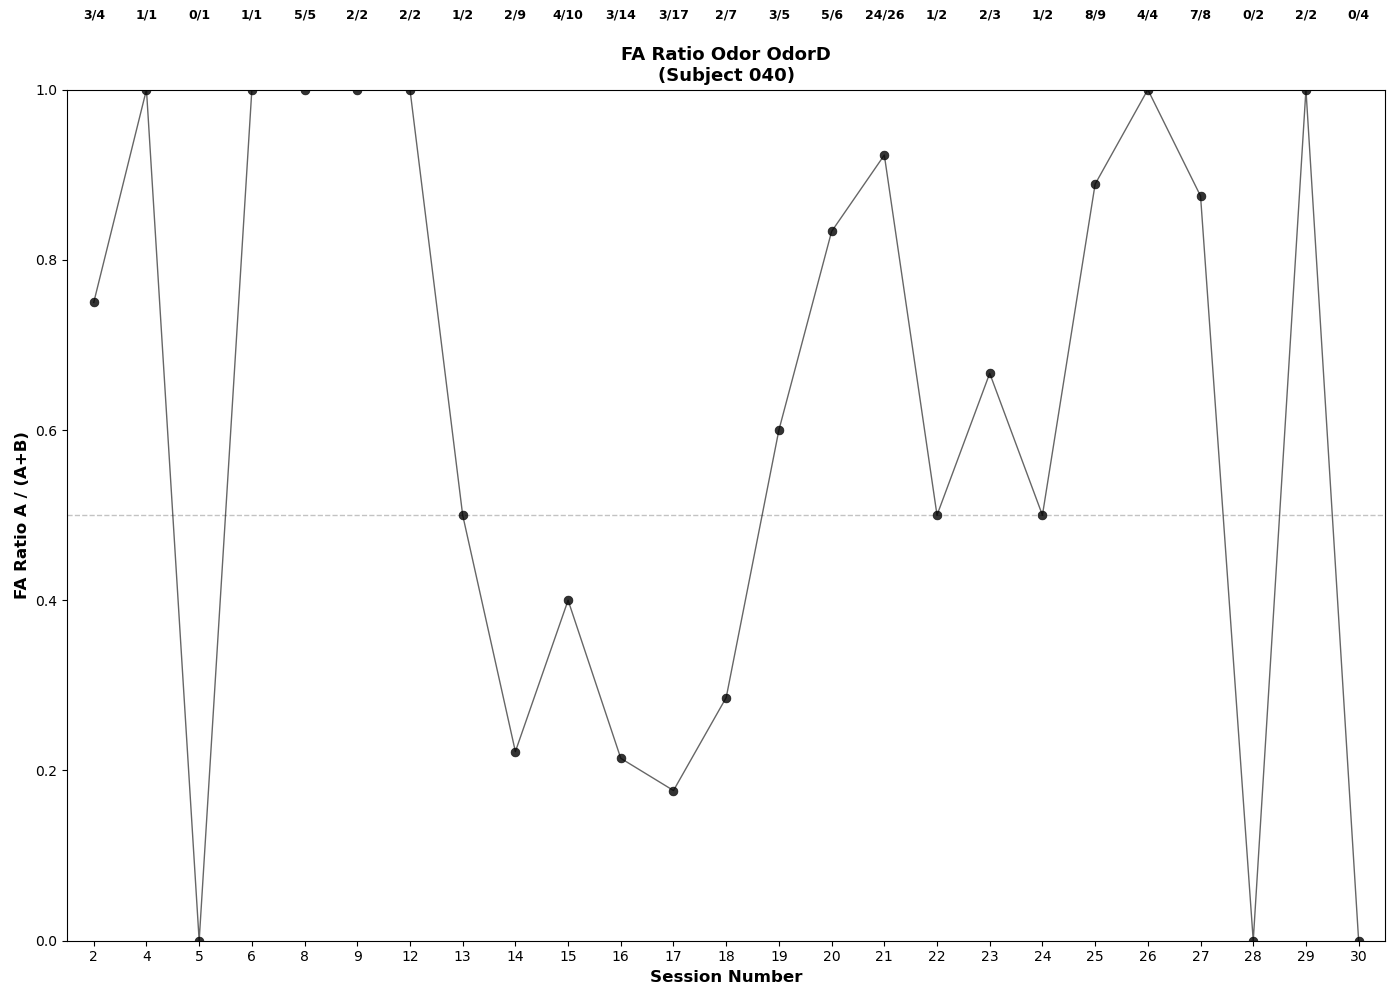

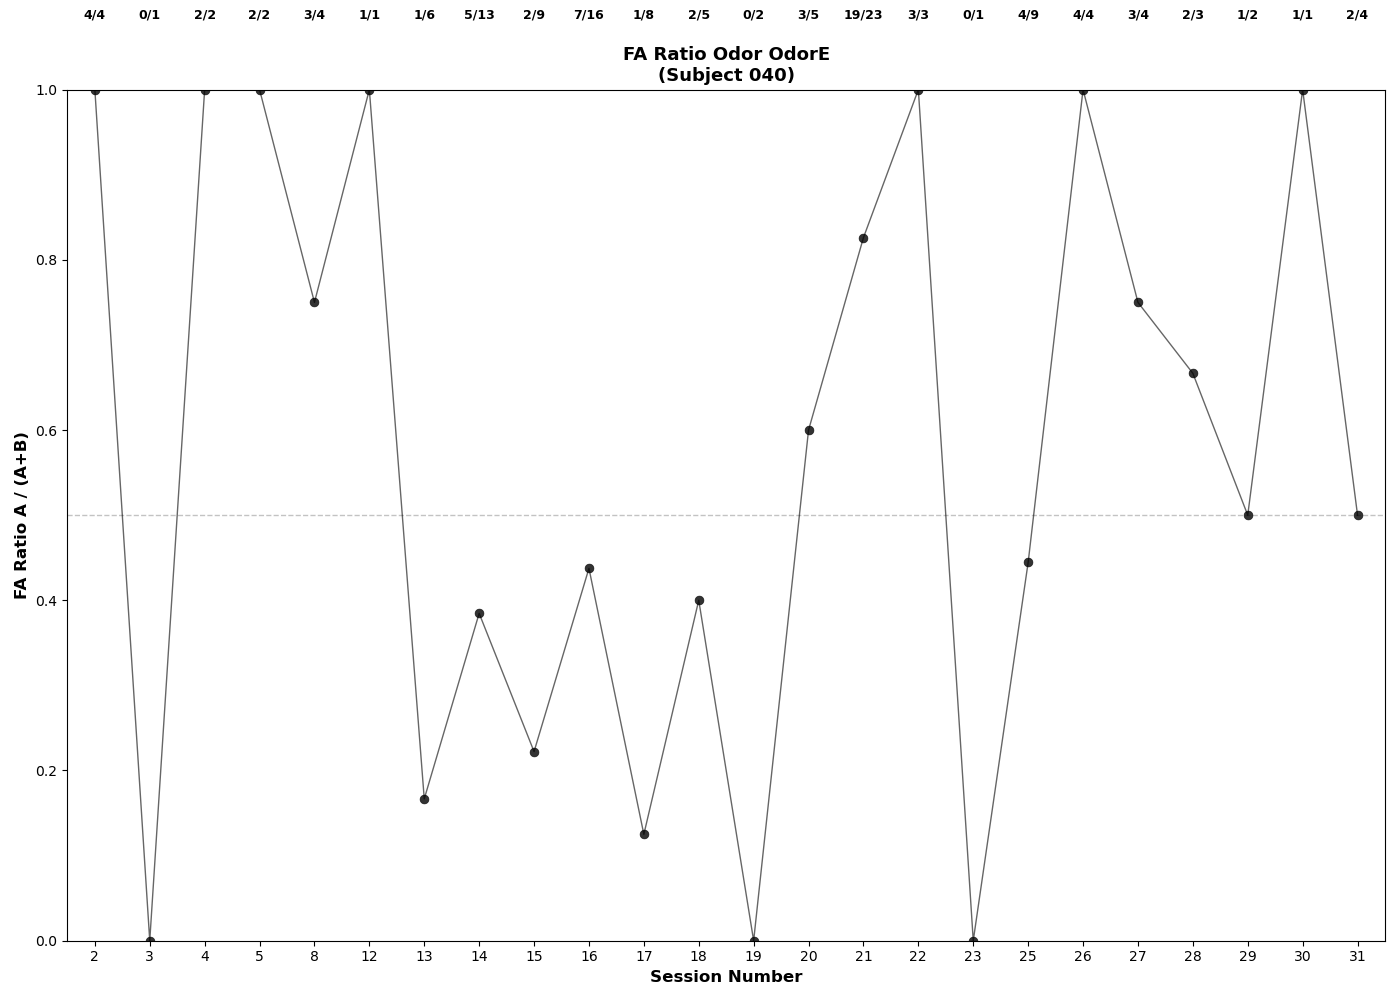

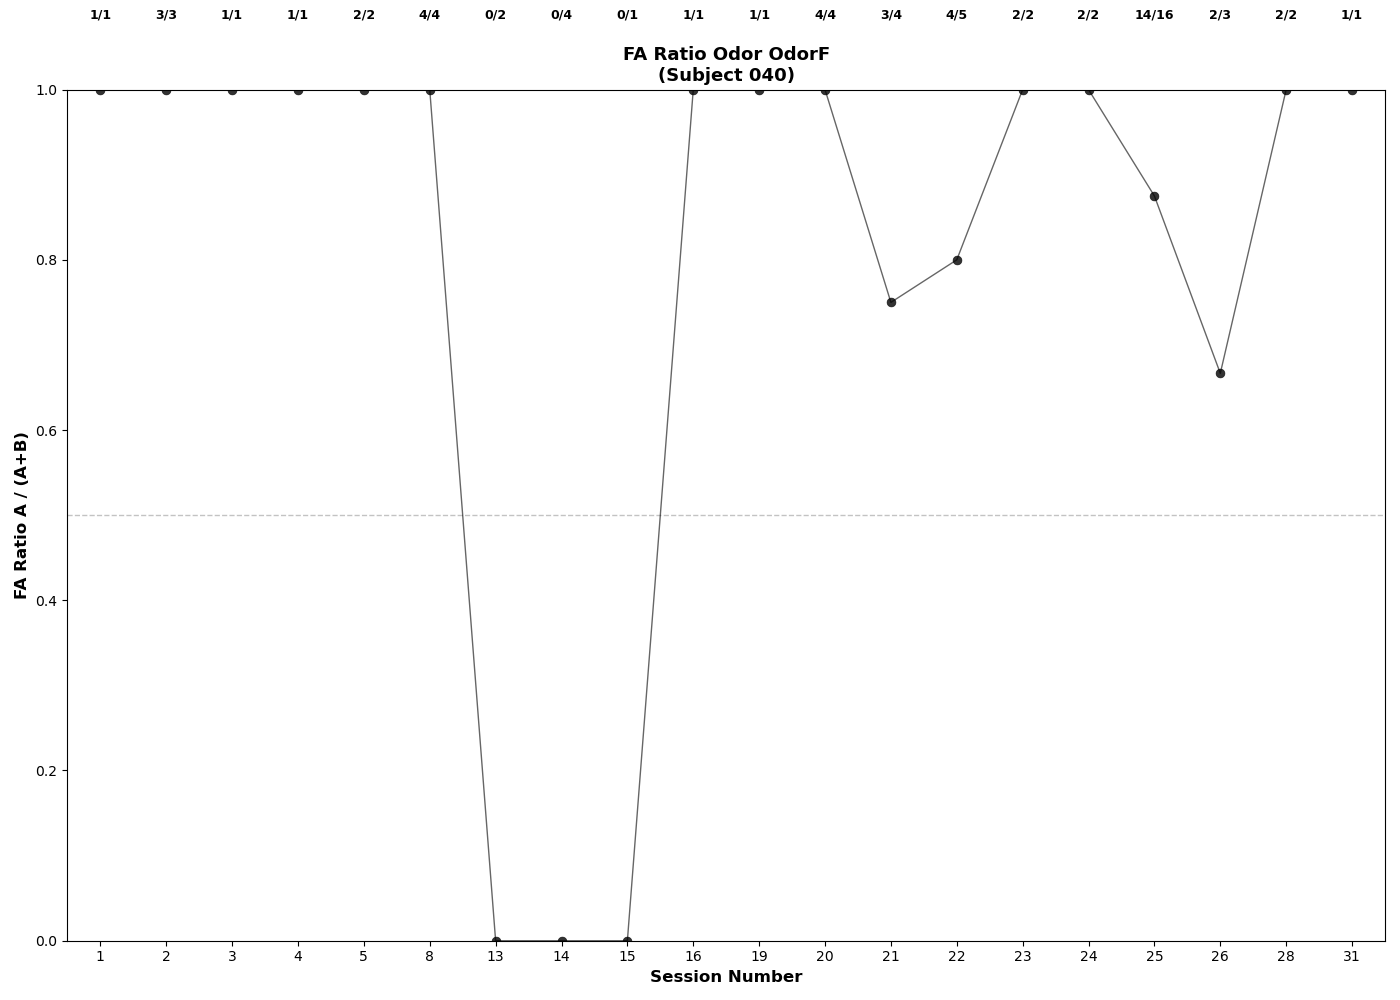

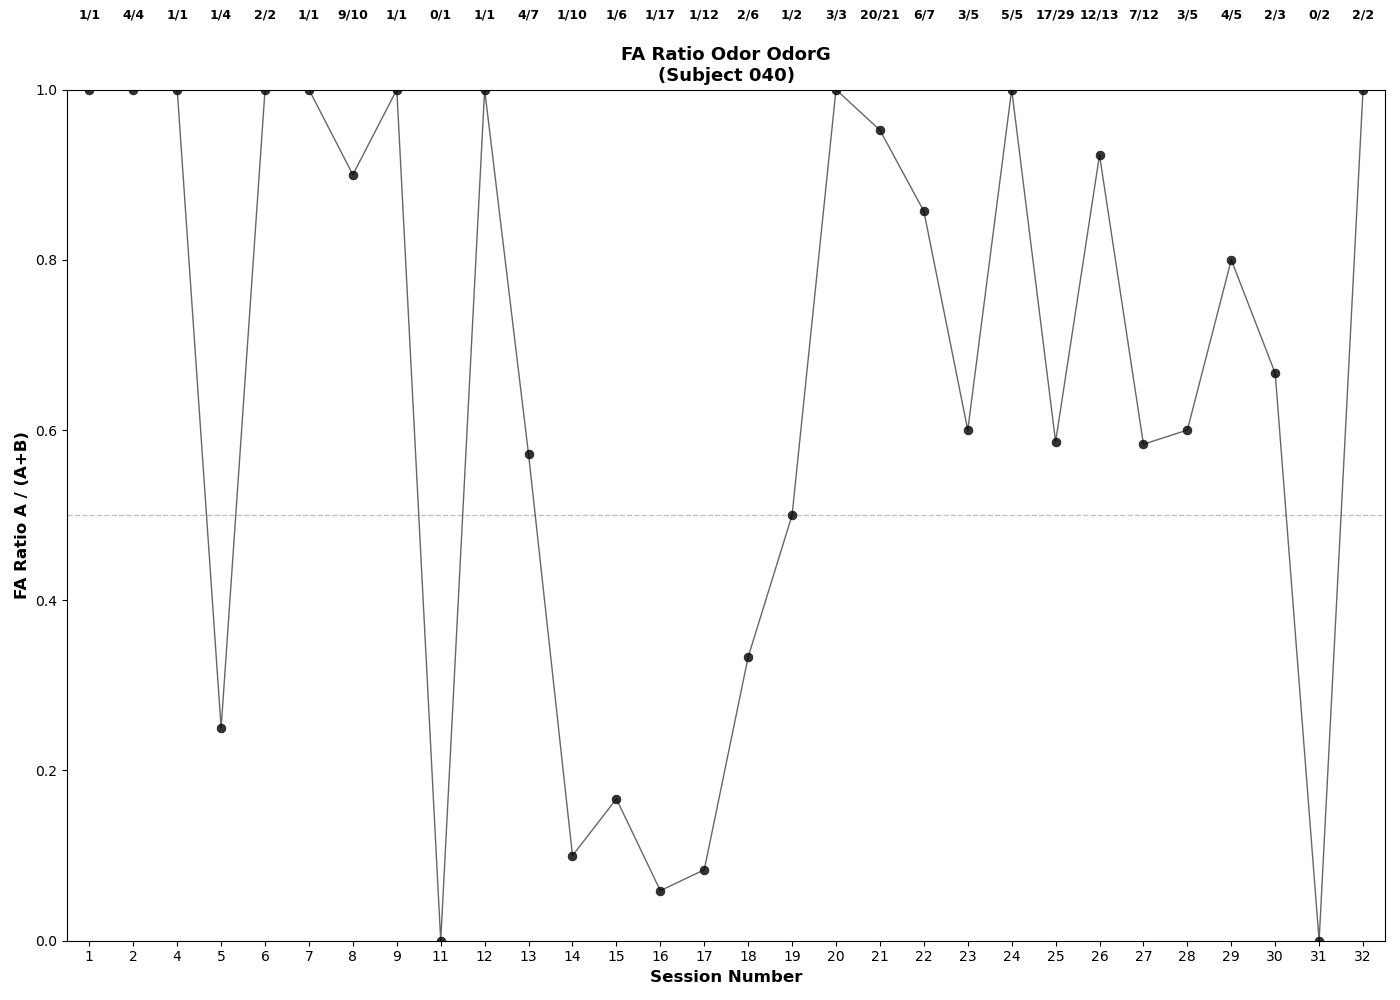

In [6]:
# Per odor plots bias if FA are for port A or B
figs = plot_fa_ratio_a_over_sessions(subjid, dates=dates)

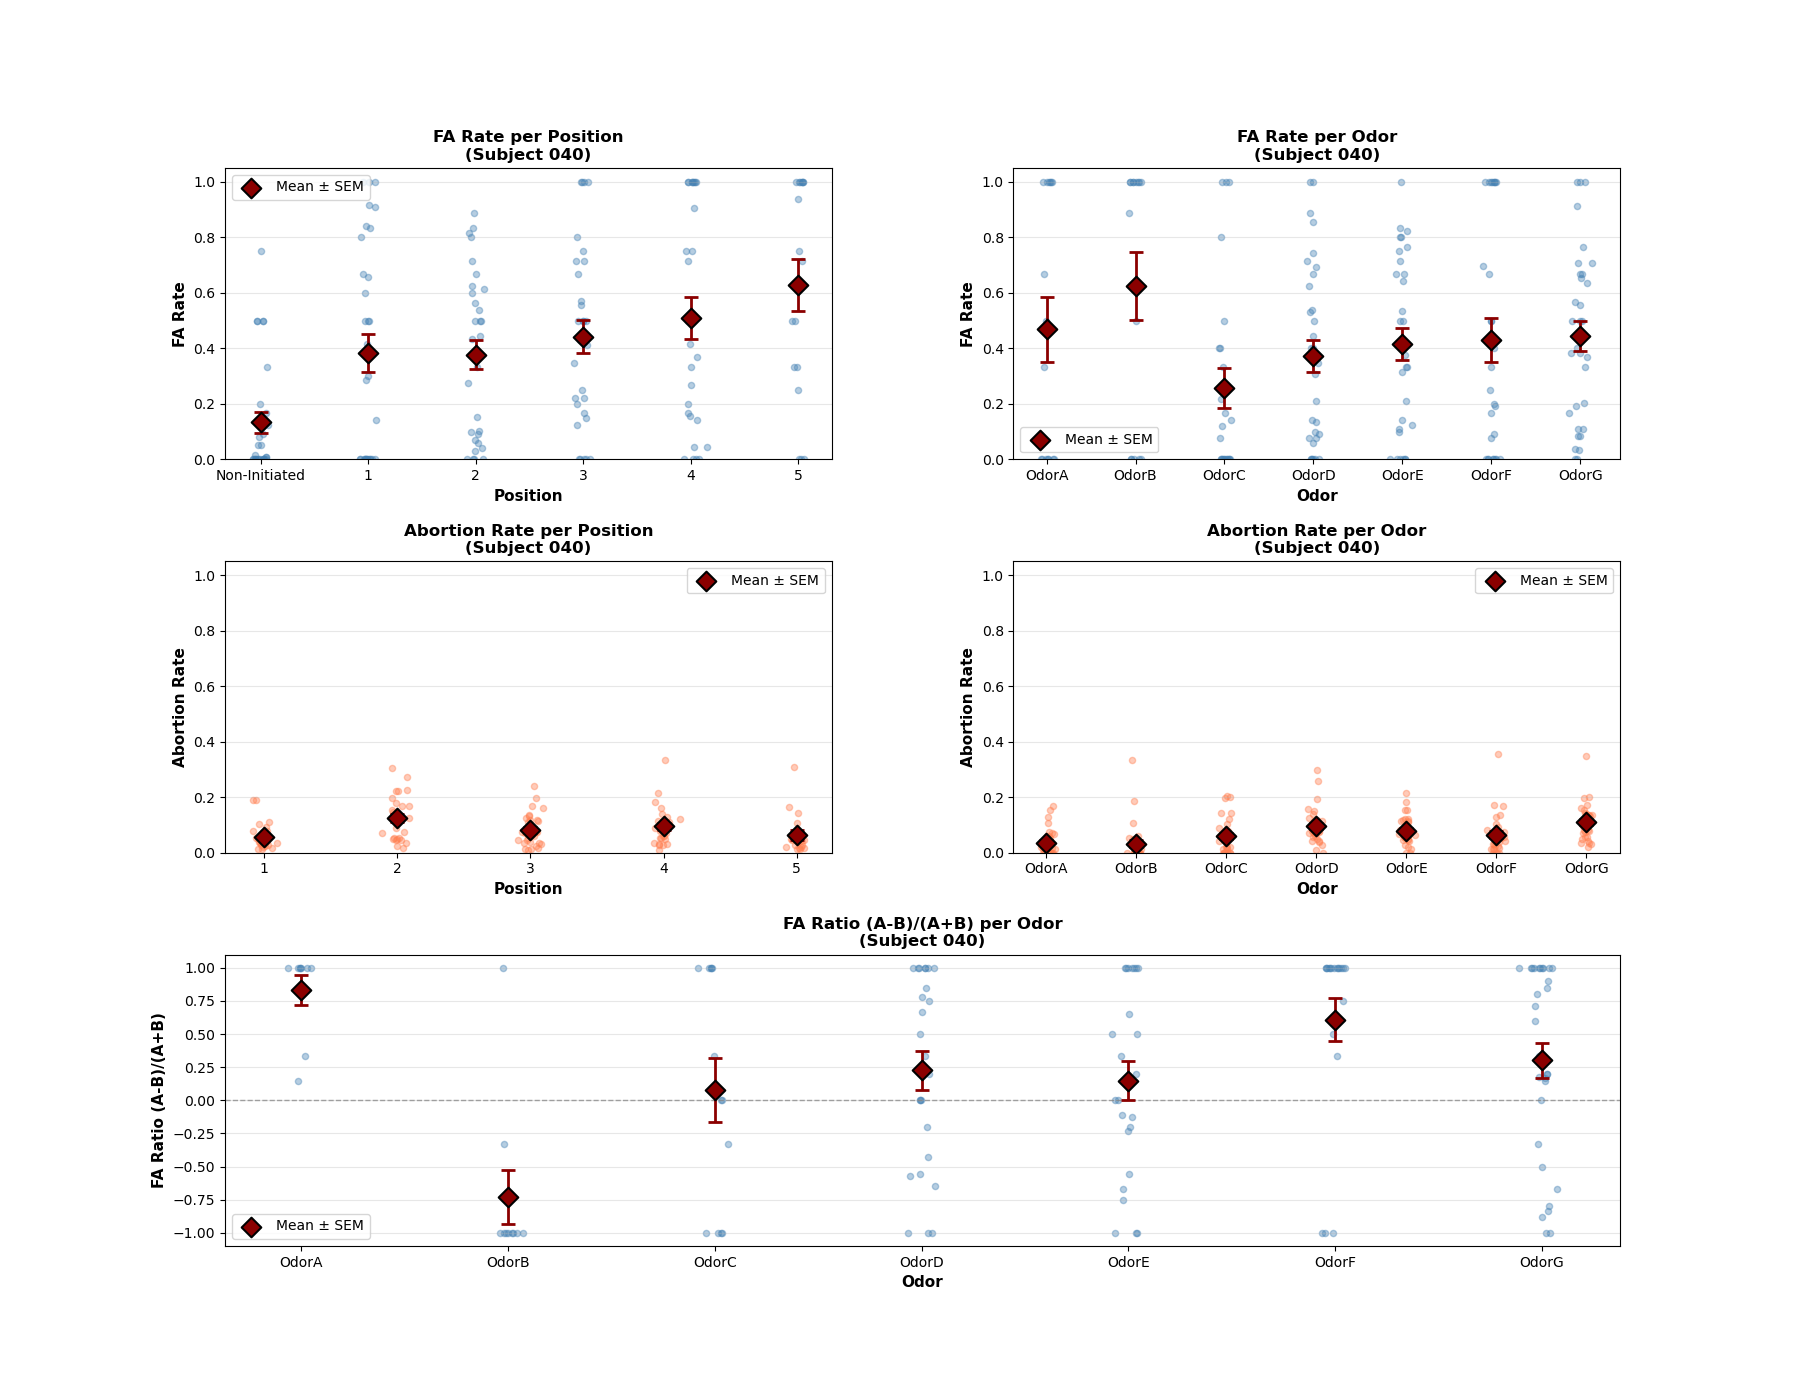

In [10]:
# Plots Early Choice and Abortion rates as boxplots across sessions for each position and odor. Can set what FA types to include and whether to include non-initiated trials in FA. 
fig, axes = plot_abortion_and_fa_rates(subjid, dates=dates, include_noninitiated_in_fa_odor=False, fa_types='FA_time_in') #can use one or more FA Type filter, or 'All'. E.g., use 'FA_time_in,FA_time_out'

[DEBUG 20251118] skipped: no hidden_rule_odors in summary params
[DEBUG 20251119] skipped: no hidden_rule_odors in summary params
[DEBUG 20251120] skipped: no hidden_rule_odors in summary params
[DEBUG 20251121] HR odor OdorB: no trials with odor in sequence
[DEBUG 20251124] skipped: no FA rows after filtering (fa_types=FA_time_in)
[DEBUG 20251124] skipped: all FAs at excluded position 5
[DEBUG 20251125] skipped: no FA rows after filtering (fa_types=FA_time_in)
[DEBUG 20251125] skipped: all FAs at excluded position 5
[DEBUG 20251126] HR odor OdorF: no trials with odor in sequence
[DEBUG 20251128] HR odor OdorC: no trials with odor in sequence
[DEBUG 20251129] skipped: no FA rows after filtering (fa_types=FA_time_in)
[DEBUG 20251129] skipped: all FAs at excluded position 5
[DEBUG 20251201] HR odor OdorC: no trials with odor in sequence
[DEBUG 20251210] HR odor OdorC: no trials with odor in sequence
[DEBUG 20251211] HR odor OdorC: no trials with odor in sequence
[DEBUG 20251227] skipped:

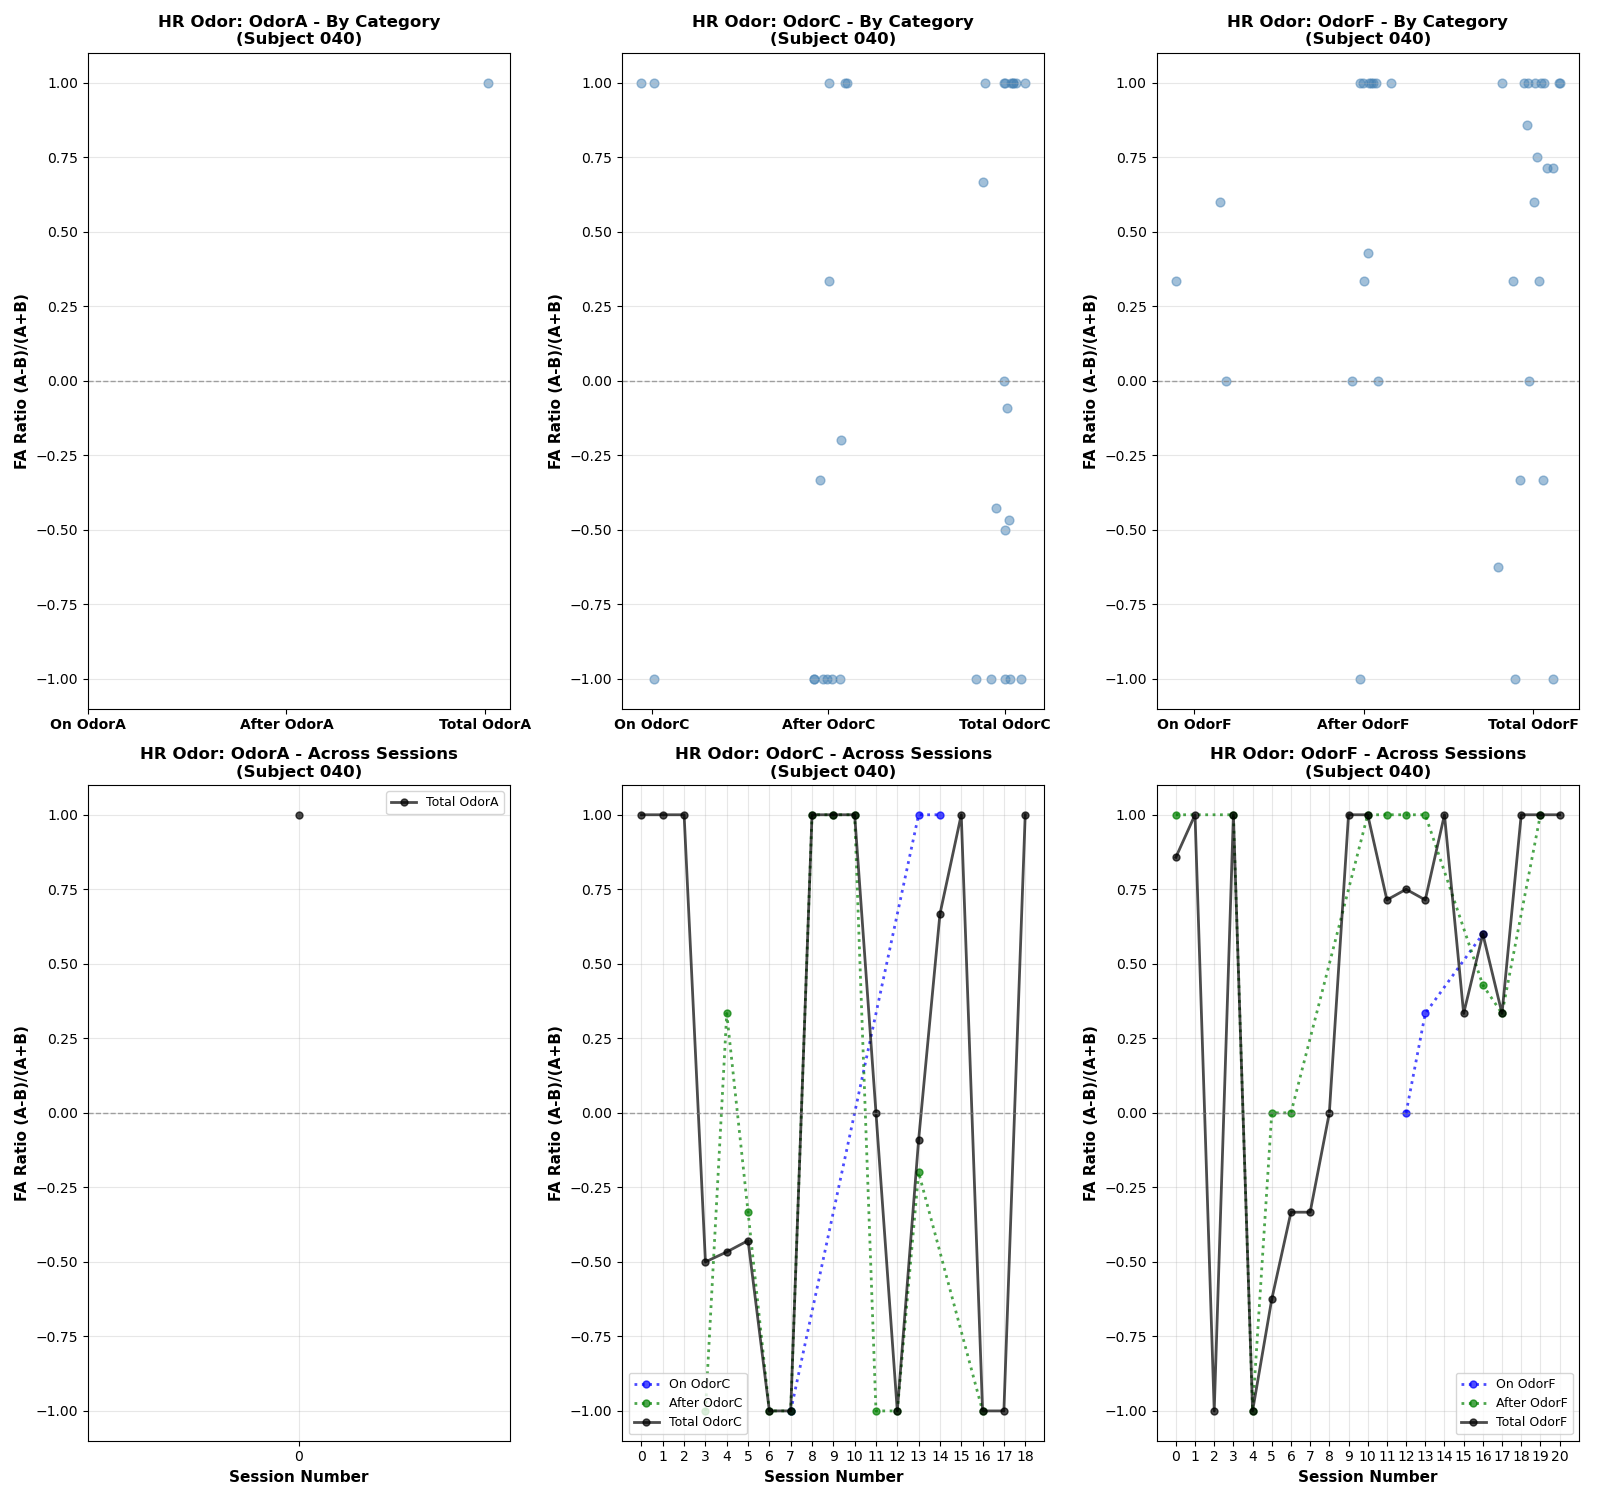

In [ ]:
# Plots if FAs are more often to reward port A or B for each odor, if FA is at that odor, one position after, or anywhere after. 
# Can filter by FA types: 'FA_time_in', 'FA_time_out', 'FA_late', or combinations like 'FA_time_in,FA_time_out'
# Can also exclude FAs at a specific position with exclude_last_pos=True (by default set to pos5, can be changed with last_odor_num=x)
fig, axes = plot_fa_ratio_by_hr_position(subjid, dates=dates, fa_types='FA_time_in', print_statistics=True, exclude_last_pos=True, debug=False)



DEBUG: Data aggregated from 26 sessions on dates: [np.int64(20251121), np.int64(20251124), np.int64(20251125), np.int64(20251126), np.int64(20251127), np.int64(20251128), np.int64(20251201), np.int64(20251203), np.int64(20251204), np.int64(20251205), np.int64(20251206), np.int64(20251208), np.int64(20251209), np.int64(20251210), np.int64(20251211), np.int64(20251212), np.int64(20251215), np.int64(20251216), np.int64(20251217), np.int64(20251218), np.int64(20251219), np.int64(20251222), np.int64(20251223), np.int64(20251226), np.int64(20251229), np.int64(20251230)]
DEBUG: Color mapping: [np.int64(20251121), np.int64(20251124), np.int64(20251125), np.int64(20251126), np.int64(20251127), np.int64(20251128), np.int64(20251201), np.int64(20251203), np.int64(20251204), np.int64(20251205), np.int64(20251206), np.int64(20251208), np.int64(20251209), np.int64(20251210), np.int64(20251211), np.int64(20251212), np.int64(20251215), np.int64(20251216), np.int64(20251217), np.int64(20251218), np.in

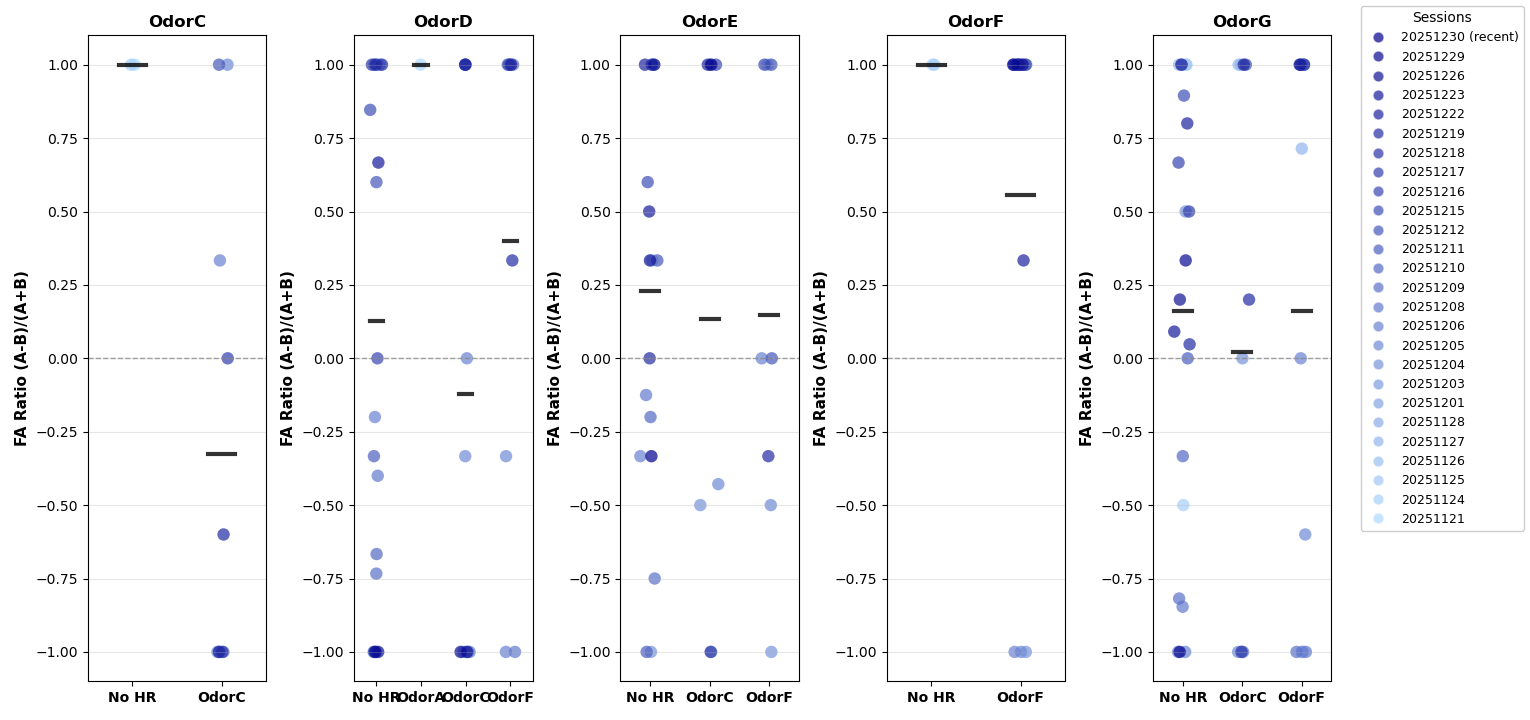

In [22]:
# Plot FA Ratio by Abortion Odor (comparing HR vs No HR trials)
# Shows FA distribution across aborted sequences grouped by the odor where abortion occurred
fig, axes = plot_fa_ratio_by_abort_odor(subjid, dates=dates, fa_types='FA_time_in')


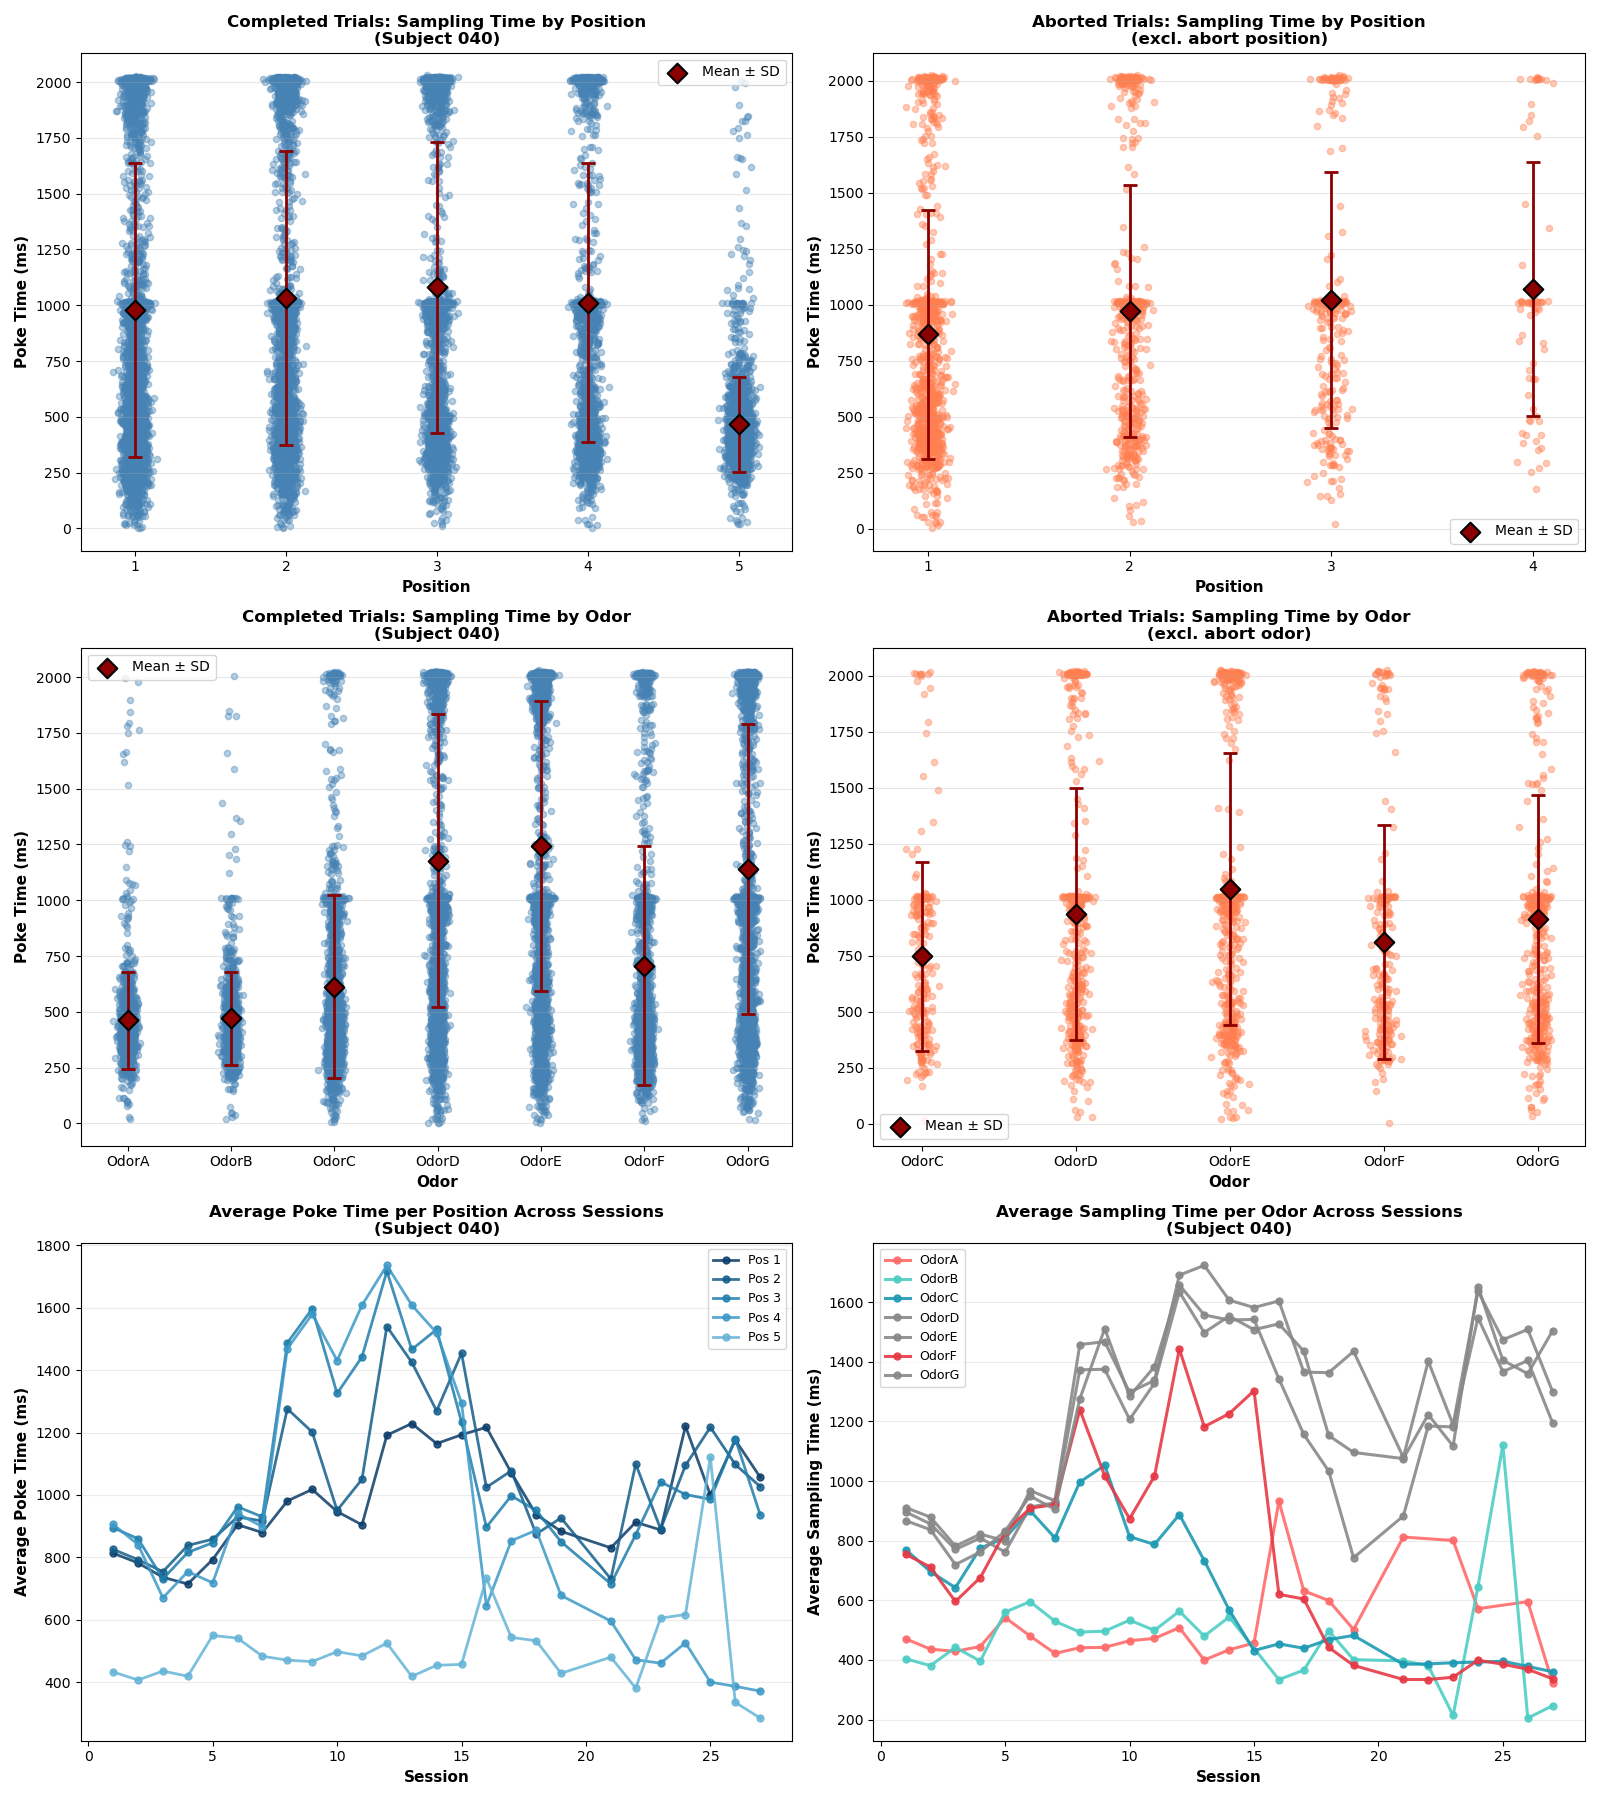

In [6]:
# Plots boxplots of every sampling time across all sessions, sepearated by position and odor. For completed trials and aborted trials. 
fig, axes = plot_sampling_times_analysis(40, dates=(20251125, 20251231))

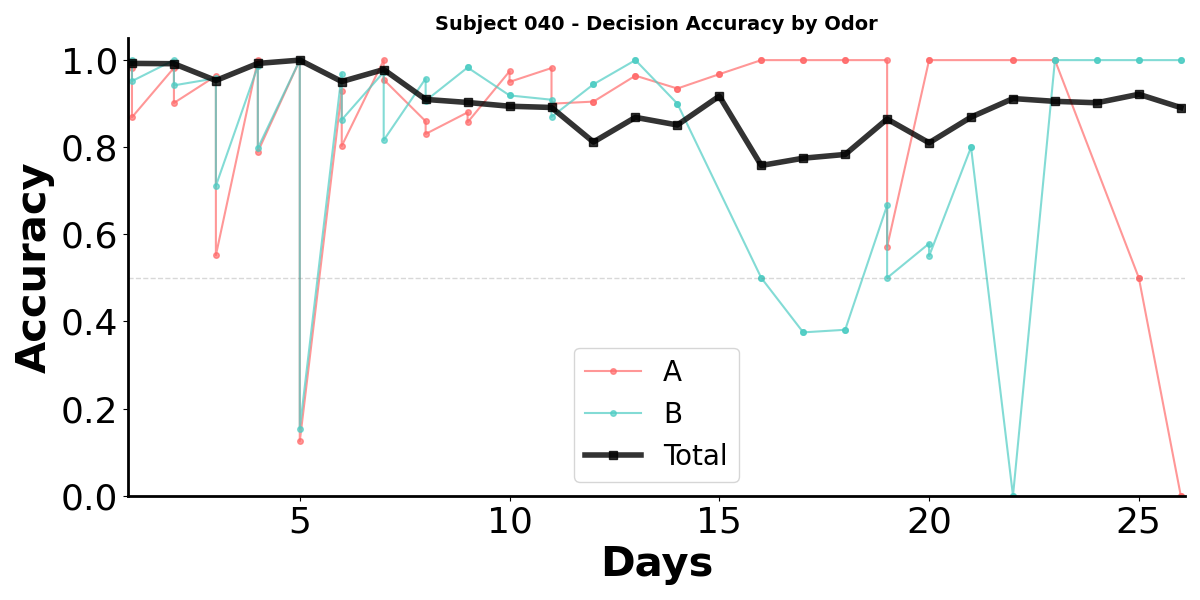

In [7]:
# Plot decision accuracy, with option to plot accuracy for A and B and global choice accuracy. 
fig, ax = plot_decision_accuracy_by_odor(40, dates=(20251125, 20251231), plot_choice_acc=False, plot_AB=True, clean_graph=False)

[_clean_graph] x label: Days
[_clean_graph] y label: Hidden Rule Detection Rate
[_clean_graph] x ticks: [5.0, 10.0, 15.0, 25.0]
[_clean_graph] y ticks: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]


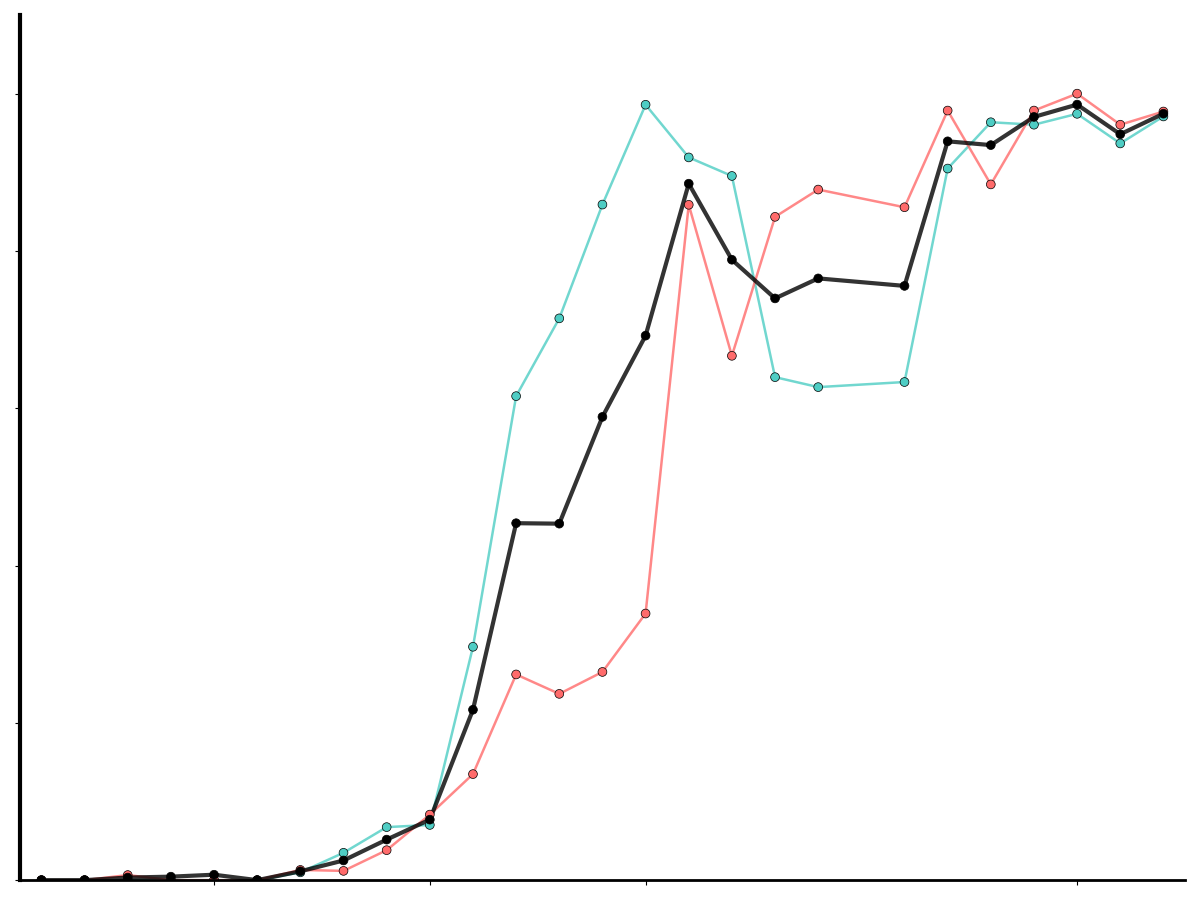

In [3]:
figs = plot_behavior_metrics(
    subjids=[40],
    dates=(20251125, 20251231),
    variables=[
        "hidden_rule_detection_rate",
    ],
    protocol_filter=None,
    compute_if_missing=False, 
    verbose=True, 
    black_white=True, 
    y_range=(0, 1.1), 
    plot_HR_separately=True, 
    clean_graph=True, 
)

# 2. Behavior / Movement analysis

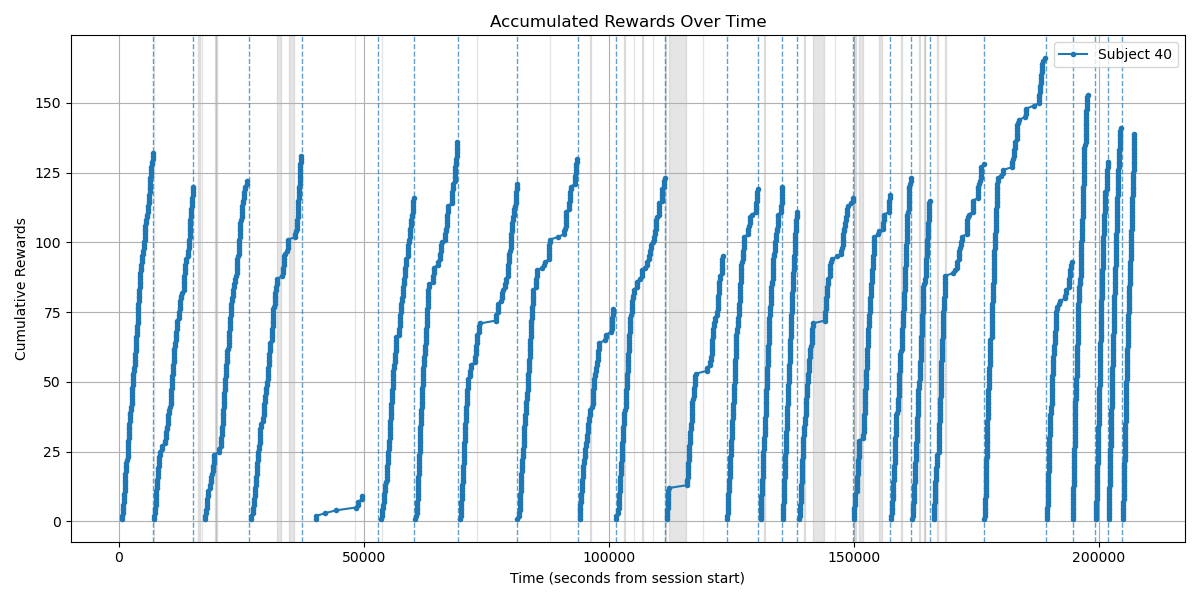

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Accumulated Rewards Over Time'}, xlabel='Time (seconds from session start)', ylabel='Cumulative Rewards'>)

In [5]:
# Plot cumulative rewards for multiple sessions and subjects. Can be split by days or consecutive. 
plot_cumulative_rewards(subjids=[40], dates=(20251125, 20251231), split_days=True)

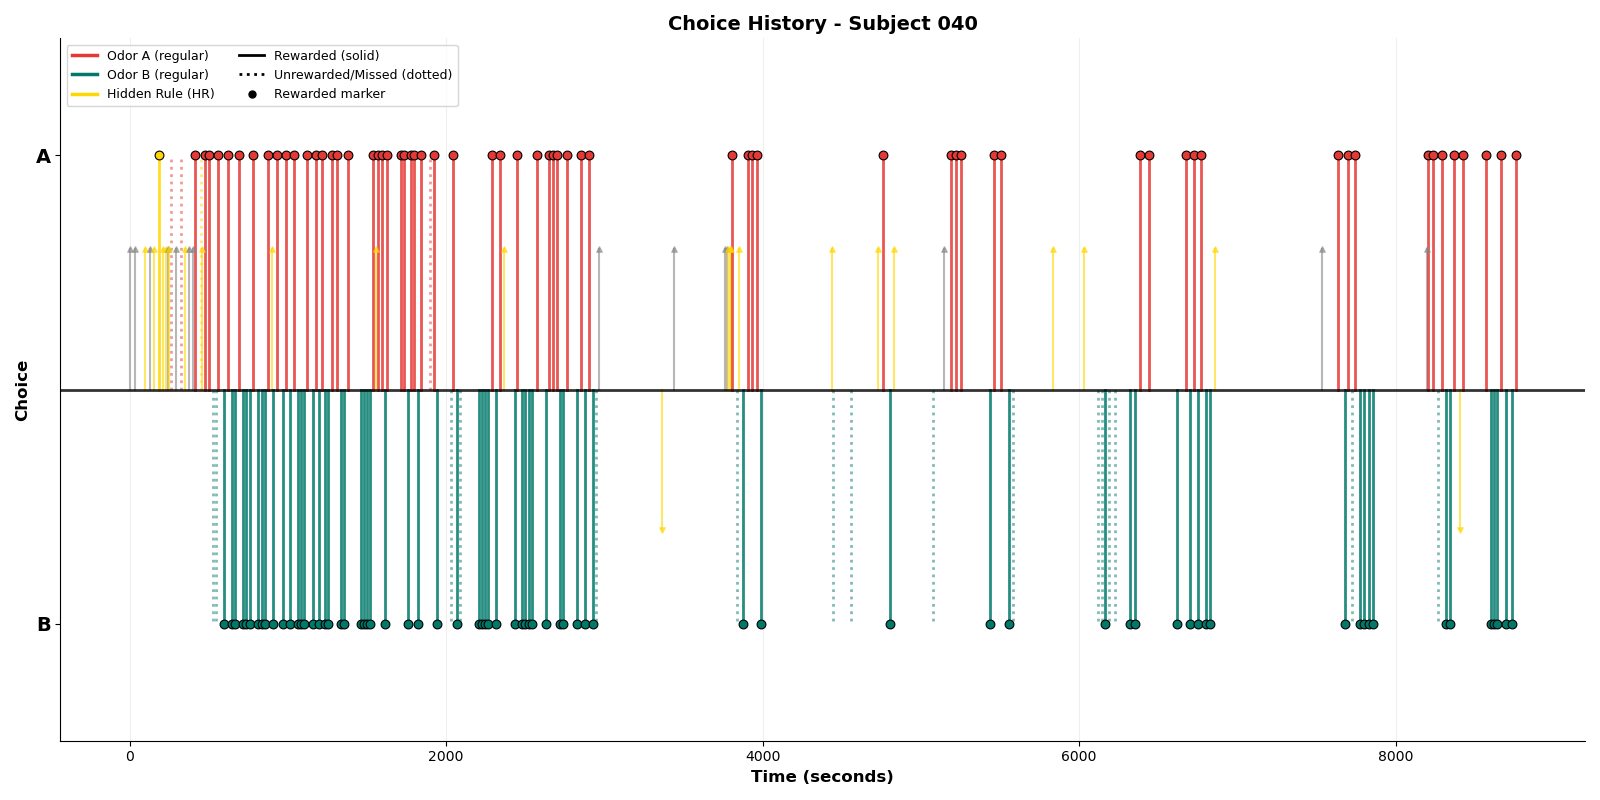

In [26]:
# Plots all choices for one or more sessions
choice_plots = plot_choice_history(subjid=40, dates=[20251203])

Loaded SLEAP tracking: 408887 frames from sub-040_ses-20251120_combined_sleap_tracking_timestamps.csv


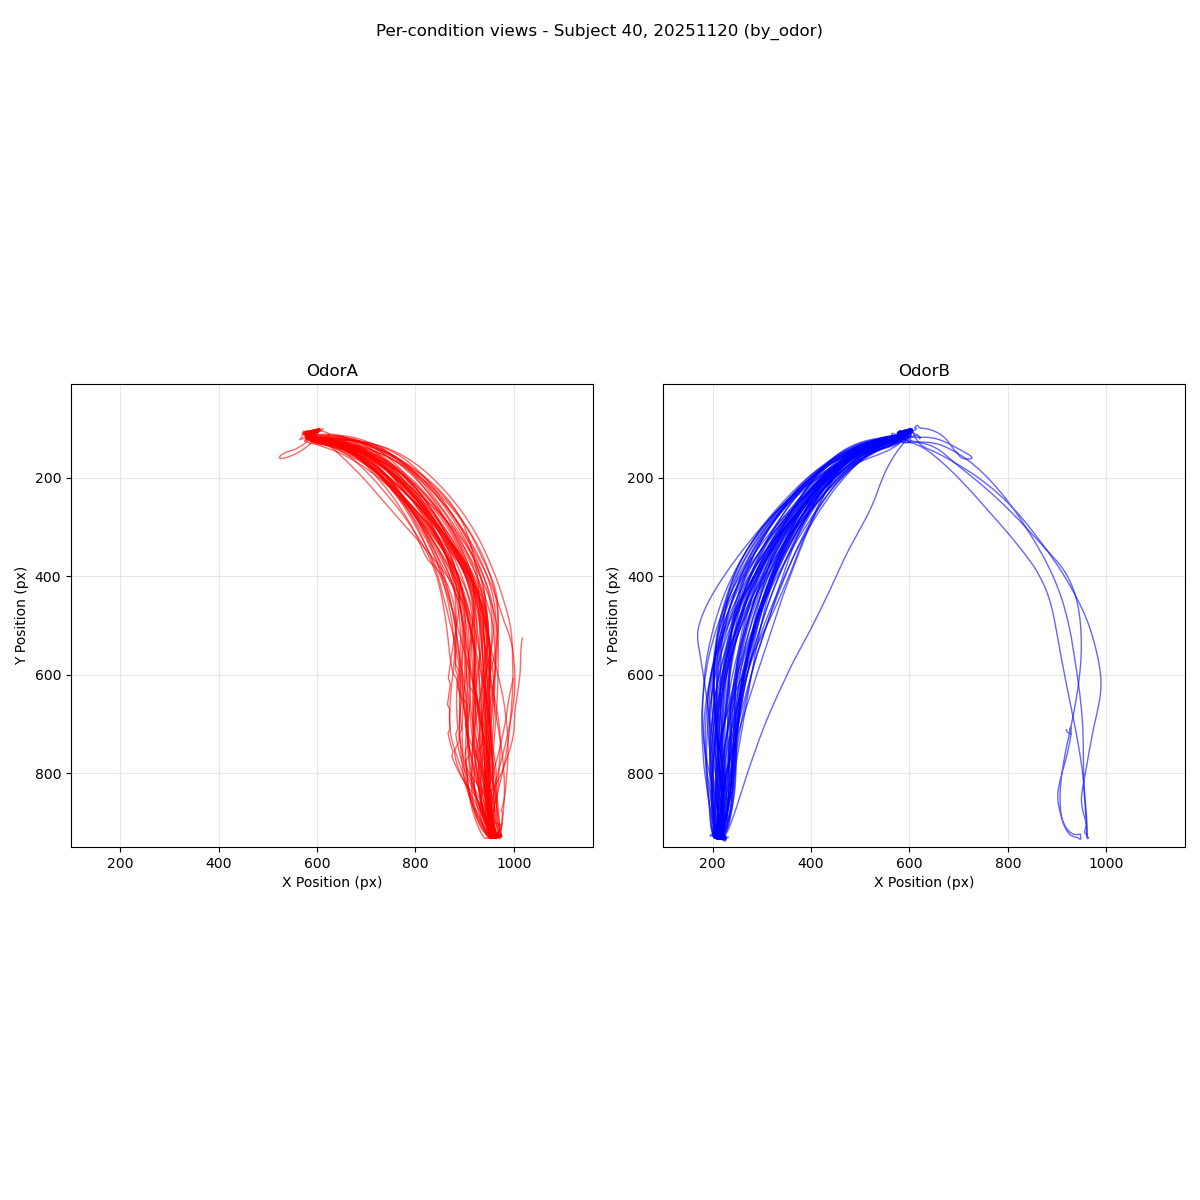

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Movement - Subject 40, 20251120 (by_odor)'}, xlabel='X Position (pixels)', ylabel='Y Position (pixels)'>)

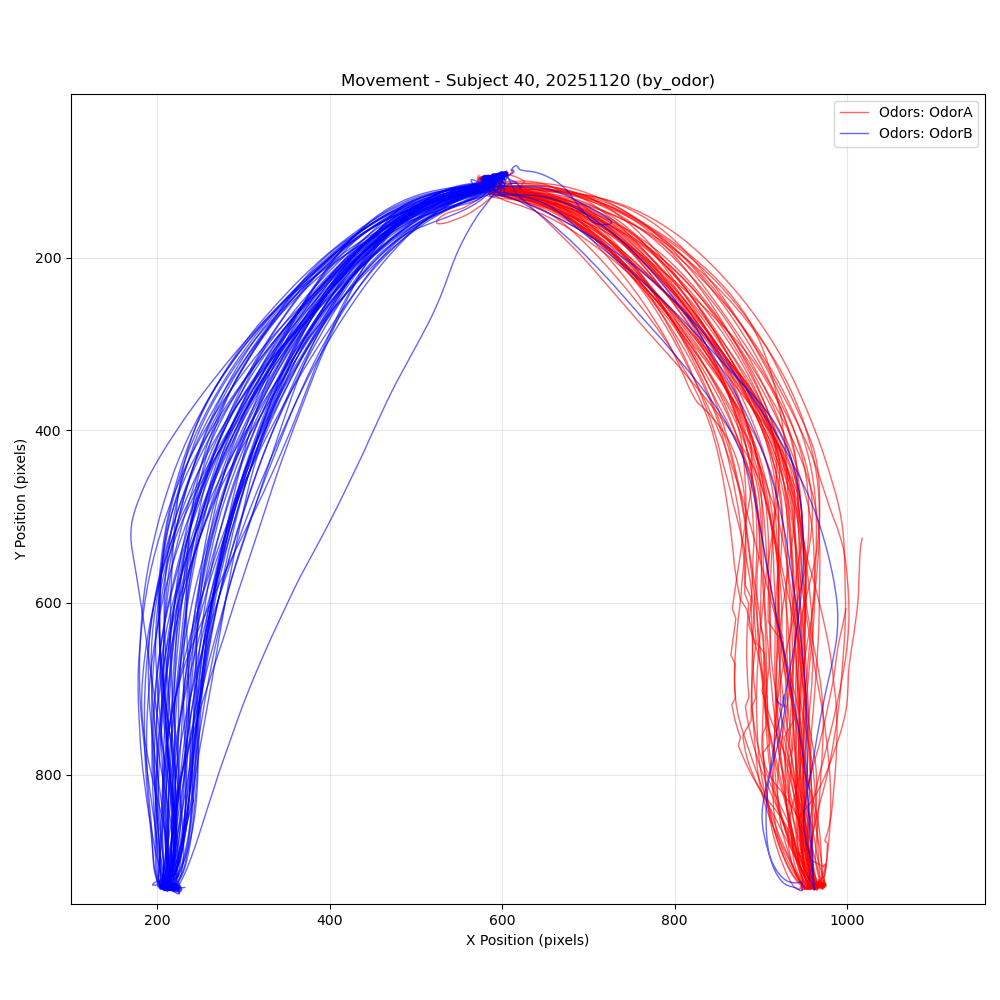

In [4]:
# modes can be simple (all movement), trial_state (within trial vs outside), last_odor (A vs B), trial_windows (one or more trial windows), time_windows (one or more time windows), or trial_windows_rew
# for trial_windows: trial_windows=[(0, 20), (-20, None)] will plot first vs last 20 trials
# for time_windows: time_windows=[("15:20:00","15:25:00"), ("16:00:00","16:05:00")] will plot 2 5-minute windows
plot_movement_with_behavior(40, 20251120, mode='by_odor', trial_windows=[(0, 10), (-10,None)], xlim=(100,1160), ylim=(10,950))


# 

## Plot movement traces for different modes - plot_trial_trace_by_mode quick guide

- Common args: subjid, dates (list [] or range ()), xlim, ylim, smooth_window (frames), linewidth, alpha, invert_y
- Modes: 
    - rewarded: rewarded trials only
    - rewarded_hr: rewarded trials; HR trials colored with HR palette
    - completed: all completed trials (rewarded, unrewarded, timeout)
    - all_trials: completed and aborted trials
    - fa_by_response: FA trials (selected by fa_types filter), sorted by response port
    - fa_by_odor: FA trials, sorted by each aborted odor
    - hr_only: hidden-rule trials, colored by associated reward port, with rewarded and unrewarded trials
- Options: 
    - show_average: adds mean trace + SEM per category
    - highlight_hr: in rewarded/all_trials mode, recolor HR trials in different palette
    - color_by_index: ignore categories; color each trace by normalized sample index
    - fa_types: filter FA labels (select between "FA_time_in", "FA_time_out", or both)

Loaded SLEAP tracking: 408887 frames from sub-040_ses-20251120_combined_sleap_tracking_timestamps.csv


[<Figure size 1800x600 with 1 Axes>,
 <Figure size 1800x600 with 1 Axes>,
 <Figure size 1800x600 with 1 Axes>]

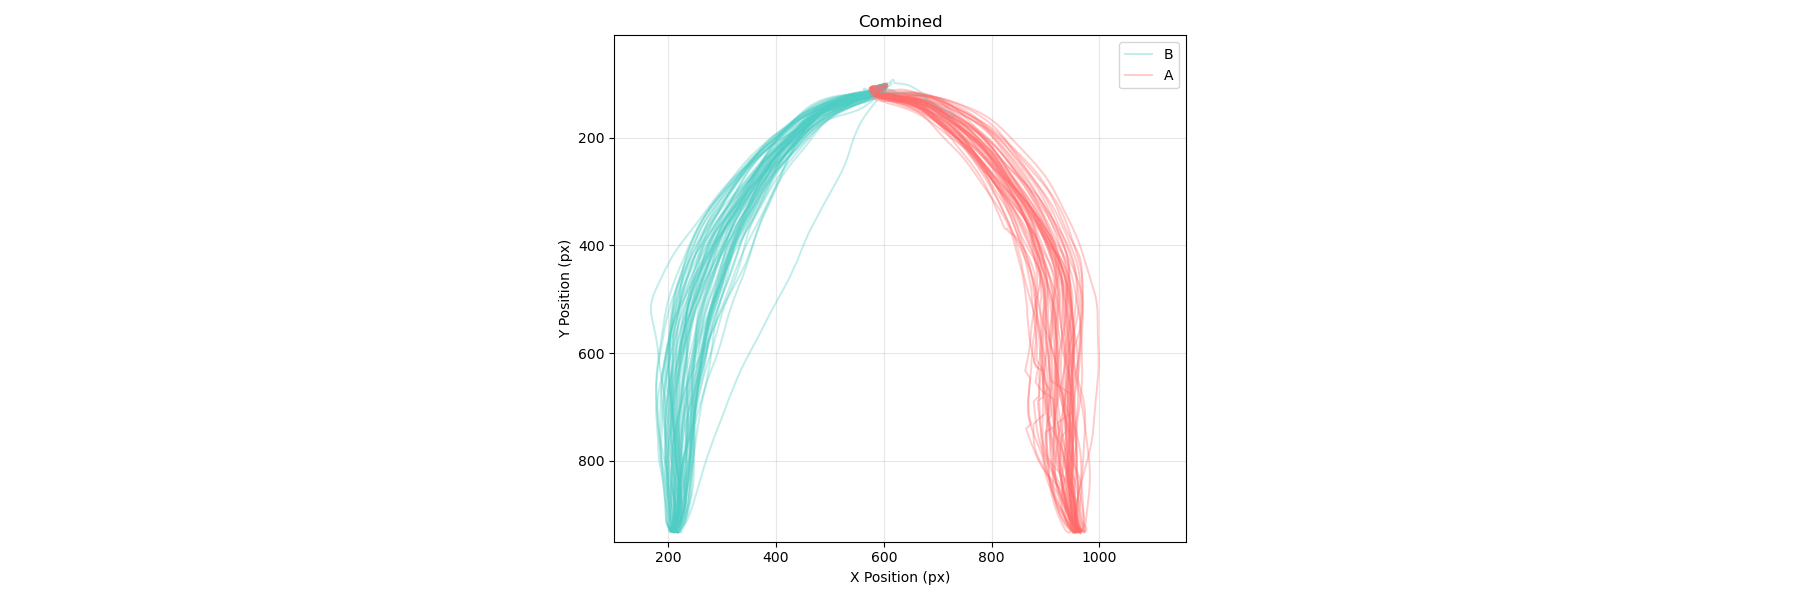

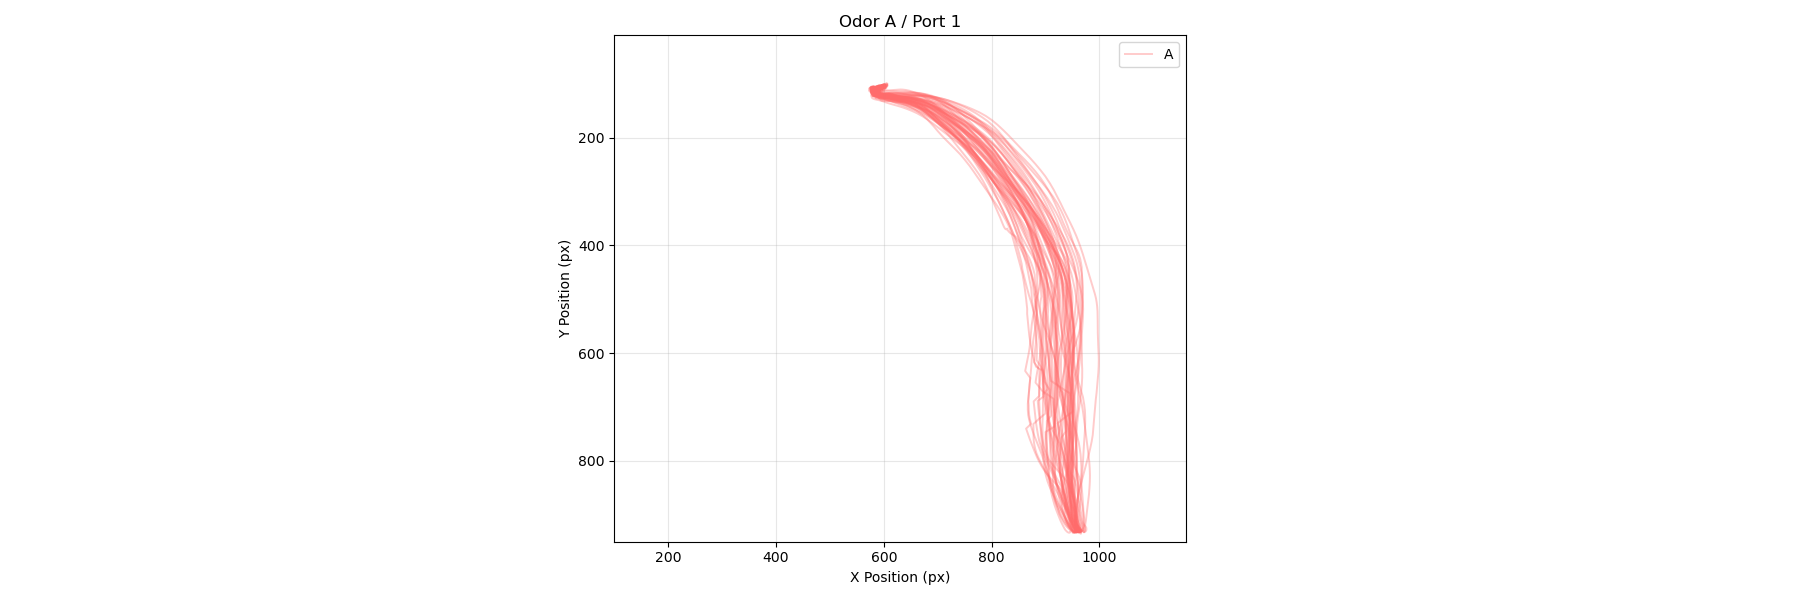

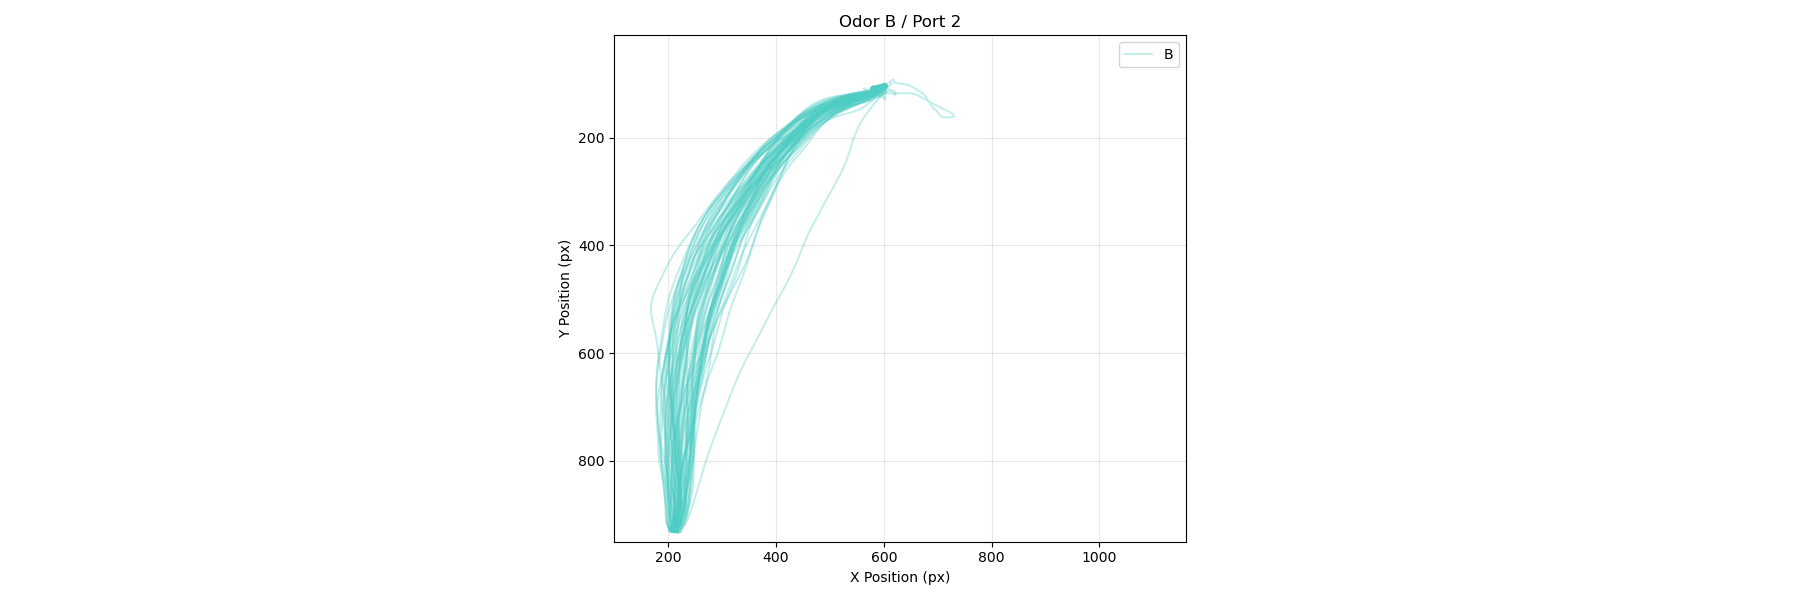

In [11]:
plot_trial_traces_by_mode(
    subjid=40,
    dates=[20251120],
    mode='rewarded',
    xlim=(100,1160),
    ylim=(10,950),
    show_average=False, 
    highlight_hr=True, 
    color_by_index=False,
    fa_types=['FA_time_in']
)

# Modes: 
    # rewarded, rewarded_hr, completed, all_trials, fa_by_response, fa_by_odor, hr_only

Loaded SLEAP tracking: 240668 frames from sub-040_ses-20251121_combined_sleap_tracking_timestamps.csv


<string>:217: RuntimeWarning: Mean of empty slice
<string>:228: RuntimeWarning: Mean of empty slice


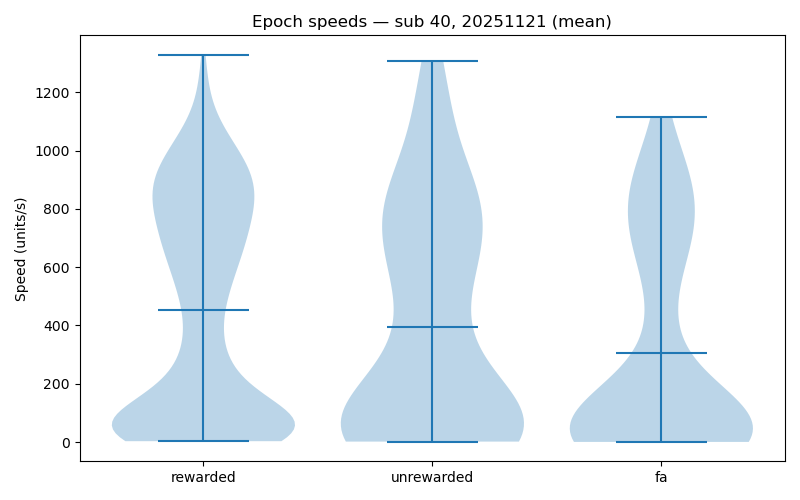

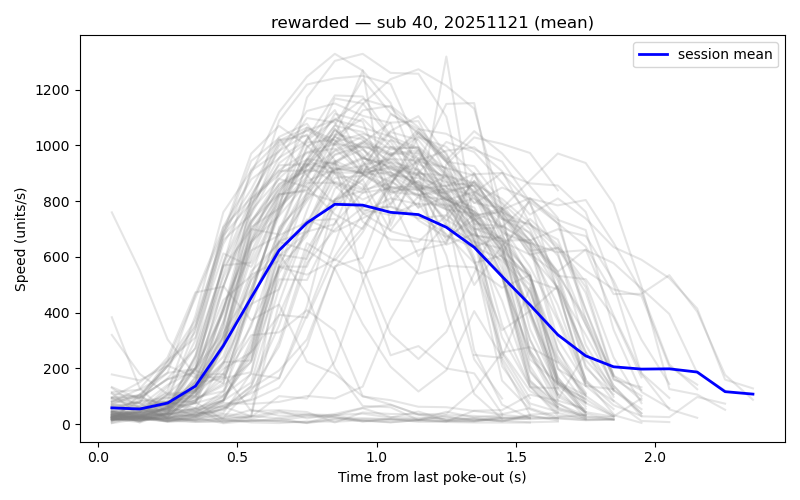

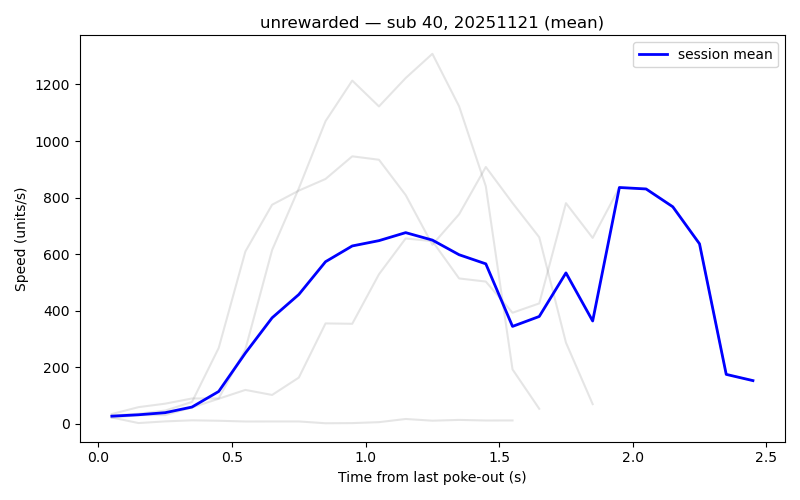

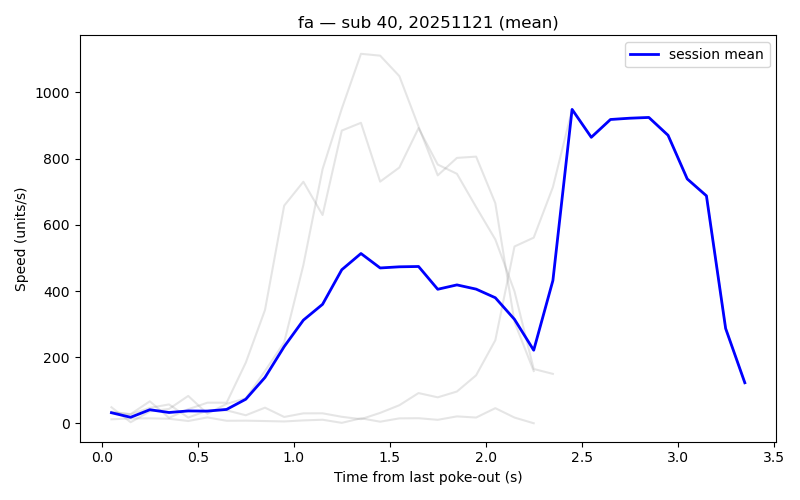

In [20]:
speed_analysis = plot_epoch_speeds_by_condition(
    subjid=40,
    dates=[20251121],
    bin_ms=100,
    pre_buffer_s=0,
    fa_label_filter=["fa_time_in"],
    mode="mean" # max or mean
)

In [13]:
plt.close('all')

In [12]:
print_cache_keys()

[CACHE CONTENTS] Current cache keys:
  (40, 20251120, 'sleap_session')
  (40, '20251120', 'sleap_session')


# Debugging
